In [ ]:
!pip install ipython-autotime
!pip install statsmodels
!pip install pmdarima
!pip install kaleido

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 19.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import dask.dataframe as dd
import seaborn as sns
import plotly.express as ex
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import statsmodels.api as sm
import random
random.seed(42)
%load_ext autotime

time: 441 µs (started: 2024-04-10 00:02:38 +00:00)


In [ ]:
# Mount Drive
from google.colab import drive
from google.colab import files
drive.mount('/content/drive')

Mounted at /content/drive
time: 20.9 s (started: 2024-04-10 00:02:38 +00:00)


#Data Cleaning
Dropping columns that have more than 60% missing values

In [ ]:
# Read in Suffolk data
# suf = pd.read_csv('drive/MyDrive/Capstone/Data/suffolk.csv')
# Drop columns that have more than 60% of missing values
# suf = suf.loc[:, (suf.isin([' ','NULL']) | suf.isnull()).mean() <= .6]
# suf.to_csv('suffolk_sub.csv')
# files.download('suffolk_sub.csv')

time: 435 µs (started: 2024-04-07 15:28:56 +00:00)


In [ ]:
# Read in Essex data
# essex = pd.read_csv('drive/MyDrive/Capstone/Data/essex.csv')
# Drop columns that have more than 60% of missing values
# essex = essex.loc[:, (essex.isin([' ','NULL']) | essex.isnull()).mean() <= .6]
# essex = essex.drop_duplicates()
# essex.to_csv('essex_sub.csv')
# !zip -r /content/essex.zip essex/
# files.download('essex.zip')

time: 6min 42s (started: 2024-03-07 12:30:40 +00:00)


In [ ]:
# nor = pd.read_csv('drive/MyDrive/Capstone/Data/norfolk.csv')
# nor = nor.loc[:, (nor.isin([' ','NULL']) | nor.isnull()).mean() <= .6]
# nor = nor.drop_duplicates()
# nor.to_csv('norf_sub.csv')
# files.download('norf_sub.csv')
# !zip -r /content/norfolk.zip norfolk/
# files.download('norfolk.zip')

In [ ]:
#middle = pd.read_csv('drive/MyDrive/Capstone/Data/middlesex_smaller.csv')
#middle = middle.loc[:, (middle.isin([' ','NULL']) | middle.isnull()).mean() <= .6]
#middle = middle.drop_duplicates()
#middle.to_csv('middle_sub.csv')
# !zip -r /content/middle.zip norfolk/
#files.download('middle_sub.csv')

<ipython-input-6-721e86045b69>:1: DtypeWarning: Columns (15,31,33,34,77,1075,1385,1392,1393,1399,1400,1401,1405,1415,1417,1418,1425,1429,1443,1445,1447,1448,1463,1465,1466,1468,1472,1474,1478,1483,1487,1491,1499,1513,1514,1515,1516,1517,1521,1530,1531,1549,1567,1571,1586,1622,1641,1659,1683,1684,1685,1704,1705,1706,1707,1708,1709,1710,1711,1728,1729,1730,1740,1743,1746,1748,1750,1751,1755,1756,1768,1769,1770,1771,1772,1774,1777,1778,1787,1790,1796,1803,1807,1808,1809,1821,1822,1824,1835,1838,1845,1846,1847,1848,1849,1850,1852,1853,1854,1855,1856,1857,1858,1859,1860,1861,1862,1863,1864,1865,1866,1867,1868,1869,1870,1871,1872,1873,1874,1875,1876,1877,1878,1879,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,1890,1891,1892,1893,1894,1895,1896,1898,1899,1900,1901,1902,1903,1907,1923,1924,1932,1933,1935,1938,1977,1990,1999,2140,2141,2142,2144,2154,2155,2156,2158,2168,2169,2170,2172,2184,2186,2198,2200,2212,2214,2226,2228,2230,2241,2248,2260,2261,2262,2263,2264,2265,2266,2267,2268,2276,227

time: 13min 9s (started: 2024-03-12 20:38:39 +00:00)


# Read Data
Read in data for analysis

In [ ]:
# Read in Suffolk data
suf = pd.read_csv('drive/MyDrive/Capstone/Data/suffolk_sub.csv')

<ipython-input-4-fdcd324c2372>:2: DtypeWarning: Columns (19,689,1674,1984,2043,2044,2055,2082,2083,2084,2085,2086,2087,2088,2089,2090,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100,2101,2102,2103,2104,2105,2106,2107,2108,2109,2110,2111,2112,2113,2114,2115,2116,2117,2118,2119,2120,2121,2122,2123,2124,2125,2126,2127,2128,2129,2130,2131,2132,2133,2134,2135,2136,2137,2503,2516,2626,2627,2628,2639,2650,2661,2672,2730,2767,2804,2841,2878,2915,2952,2989,3016,3017,3018,3023,3029,3039,3040,3044,3060,3061,3062,3067,3073,3080,3084,3088,3100,3103,3232,3314,3375) have mixed types. Specify dtype option on import or set low_memory=False.
  suf = pd.read_csv('drive/MyDrive/Capstone/Data/suffolk_sub.csv')


time: 38.3 s (started: 2024-04-10 00:02:59 +00:00)


In [ ]:
# Read in Essex data
essex = pd.read_csv('drive/MyDrive/Capstone/Data/essex_sub.csv')

<ipython-input-5-6aa9b39584ba>:2: DtypeWarning: Columns (9,10,11,17,27,28,30,47,57,58,59,65,75,76,78,99,110,190,399,404,410,414,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,501,539,548,549,551,553,554,555,556,557,558,559,585,586,588,590,591,592,593,594,595,596,613,622,623,625,627,628,629,630,631,632,633,659,660,662,664,665,666,667,668,669,670,696,697,699,701,702,703,704,705,706,707,724,733,734,736,738,739,740,741,742,743,744,770,771,773,775,776,777,778,779,780,781,807,808,810,812,813,814,815,816,817,818,837,1337,1341,1348,1355,1358,1369,1380,1419,1439,1462,1470,1471,3231) have mixed types. Specify dtype option on import or set low_memory=False.
  essex = pd.read_csv('drive/MyDrive/Capstone/Data/essex_sub.csv')


time: 1min 39s (started: 2024-04-10 00:03:37 +00:00)


In [ ]:
# Read in Norfolk data
nor = pd.read_csv('drive/MyDrive/Capstone/Data/norf_sub.csv')

<ipython-input-6-20251d9ec523>:2: DtypeWarning: Columns (1347,1352,1547,1554,1569,1679,1690,1701,1712,1734,1759,1760,1761,1796,1797,1798,1833,1834,1835,1870,1871,1872,1907,1908,1909,1944,1945,1946,1981,1982,1983,2018,2019,2020,2046,2048,2049,2050,2051,2153,2154,2155,2156,2157,2158,2159,2160,2161,2162,2163,2164,2167,2169,2208,2249,2290,2331,2372,3282) have mixed types. Specify dtype option on import or set low_memory=False.
  nor = pd.read_csv('drive/MyDrive/Capstone/Data/norf_sub.csv')


time: 1min 33s (started: 2024-04-10 00:05:17 +00:00)


In [ ]:
# Read in Middlesex data
middle = pd.read_csv('drive/MyDrive/Capstone/Data/middlesex_small.csv')

time: 2.03 s (started: 2024-04-10 00:06:51 +00:00)


In [ ]:
# Create one dataset with data from all counties
all = pd.concat([suf, nor, essex, middle])
all = all.loc[:, (all.isin([' ','NULL', 'null', '']) | nor.isnull()).mean() <= .6]

time: 4min 40s (started: 2024-04-10 00:06:53 +00:00)


In [ ]:
all.head() # has 130,536 rows and 4325 columns

,Unnamed: 0,zpid,maloneId,city,state,homeStatus,address_streetAddress,address_city,address_state,address_zipcode,...,NFSHDPBottomSlot_messages_0_decisionContext_entryActionLinks_0_leadType,NFSHDPBottomSlot_messages_0_decisionContext_entryActionLinks_0_link,NFSHDPTopSlot_messages_0_qualifiedTreatments_2_id,NFSHDPTopSlot_messages_0_qualifiedTreatments_2_name,NFSHDPTopSlot_messages_0_qualifiedTreatments_2_status,NFSHDPTopSlot_messages_0_qualifiedTreatments_2_lastModified,NFSHDPBottomSlot_messages_0_qualifiedTreatments_1_id,NFSHDPBottomSlot_messages_0_qualifiedTreatments_1_name,NFSHDPBottomSlot_messages_0_qualifiedTreatments_1_status,NFSHDPBottomSlot_messages_0_qualifiedTreatments_1_lastModified
0,0,59164353,2.001397e+09,Boston,MA,SOLD,100 Fulton St APT 1D,Boston,MA,2109,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,67398919,2.001523e+09,East Boston,MA,SOLD,124 Everett St #2,East Boston,MA,2128,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,59111603,1.013195e+09,Dorchester,MA,OTHER,9 Marlin Way,Dorchester,MA,2122,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,63712215,2.001416e+09,Boston,MA,RECENTLY_SOLD,234 Causeway St APT 714,Boston,MA,2114,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,59099904,1.002947e+09,Charlestown,MA,RECENTLY_SOLD,6 Shipway Pl,Charlestown,MA,2129,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


time: 2.05 s (started: 2024-04-04 15:34:12 +00:00)


Drop nfsdh data and images, since they aren't useful for this analysis

In [ ]:
nfsdh = [col for col in all.columns if 'NFSHDP' in col]
photos = [col for col in all.columns if 'Photos' in col]
top_nav = [col for col in all.columns if 'topnav_json' in col.lower()]
drop_cols = nfsdh + photos + top_nav

time: 3.35 ms (started: 2024-04-10 00:11:34 +00:00)


In [ ]:
all_clean = all.drop(columns=drop_cols, axis=1) # 130,536 rows and 1071 columns

time: 3.02 s (started: 2024-04-10 00:11:34 +00:00)


# Add date information to dataset



In [ ]:
def quarter(x):
    if x in ['01', '02', '03']:
        return 'Q1'
    elif x in ['04', '05', '06']:
        return 'Q2'
    elif x in ['07', '08', '09']:
        return 'Q3'
    elif x in ['10', '11', '12']:
        return 'Q4'

time: 770 µs (started: 2024-04-10 00:11:37 +00:00)


In [ ]:
# Save month sold in to variable
all_clean['month'] = all_clean['dateSoldString'].str[5:7]
# Save month year in to variable
all_clean['year'] = all_clean['dateSoldString'].str[0:4]
# Save quarter sold in to variable
all_clean['quarter'] = all_clean['month'].apply(quarter)
# Save year quarter sold in to variable
all_clean['yr-quarter-string'] = all_clean['year'].str[2:4] + '-' + all_clean['quarter']
all_clean['year-month'] = all_clean['year'] + '-' + all_clean['month']
#all_clean['yr-month'] = all_clean['year'].str[2:4] + '-' + all_clean['month']
# Update the 'city' value to 'Wellesley' for those rows
all_clean.loc[all_clean['city'] == 'Wellesley Hills', 'city'] = 'Wellesley'

sorted_df = all_clean.sort_values(['year-month'])

<ipython-input-12-aa1a4c4ebabf>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  all_clean['month'] = all_clean['dateSoldString'].str[5:7]
<ipython-input-12-aa1a4c4ebabf>:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  all_clean['year'] = all_clean['dateSoldString'].str[0:4]
<ipython-input-12-aa1a4c4ebabf>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

time: 3.41 s (started: 2024-04-10 00:11:37 +00:00)


In [ ]:
#avg = sorted_df.groupby(['yr-quarter-string', 'city'])['lastSoldPrice'].mean().to_frame('price').reset_index()
avg = sorted_df.groupby(['year-month', 'city'])['lastSoldPrice'].mean().to_frame('price').reset_index()
avg.shape

(3244, 3)

time: 88.8 ms (started: 2024-04-10 00:11:40 +00:00)


In [ ]:
avg.head()

,year-month,city,price
0,2003-10,Lowell,297000.0
1,2007-12,Lowell,221000.0
2,2009-08,Reading,440000.0
3,2015-08,Chelsea,240000.0
4,2015-09,Chelsea,225000.0


time: 31.9 ms (started: 2024-04-07 22:52:00 +00:00)


In [ ]:
# Save dates as datetime objects, will be useful later on
#all_clean['dateSoldString'] = pd.to_datetime(all_clean['dateSoldString'])
#all_clean['year_q'] = pd.PeriodIndex(all_clean['dateSoldString'], freq='Q')
# Update the 'city' value to 'Wellesley' for those rows
# Get average price by city
avg_price = sorted_df.groupby(['year-month', 'city'])['lastSoldPrice'].mean().to_frame('price').reset_index()

#indexState = all_clean[all_clean.address_state != 'MA'].index
#df = all_clean.drop(indexState)
#cities_to_keep = all_clean[all_clean['year_q'] == '2020Q4']['city'].unique()
#df_filtered = all_clean[all_clean['address_city'].isin(cities_to_keep)]

time: 64.3 ms (started: 2024-04-10 00:11:40 +00:00)


In [ ]:
avg_price.shape

(3244, 3)

time: 2.89 ms (started: 2024-04-10 00:11:40 +00:00)


In [ ]:
fig = ex.line(avg_price, x = 'year-month',y='price', labels={
                     "yr-quarter": "Year Quarter",
                     "price": "Price in USD"}, title='Average Sale Price by City')
fig.update_layout(showlegend=False)

time: 1.33 s (started: 2024-04-10 00:13:01 +00:00)


In [ ]:
#sns.lineplot(data=test, x='yr-quarter', y='price', hue='address_city', palette='Pastel1')
fig = ex.line(avg_price, x = 'year-month',y='price', color = 'city', labels={
                     "yr-quarter": "Year Quarter",
                     "price": "Price in USD"}, title='Average Sale Price by City')
fig.update_layout(showlegend=False)

time: 1.73 s (started: 2024-04-09 12:45:02 +00:00)


In [ ]:
sorted_df.value_counts(subset=['county'])

county           
Norfolk County       24313
Essex County         23078
Suffolk County       15311
Middlesex County      9693
Providence County       46
Bristol County           7
Rockingham County        5
Worcester County         3
Name: count, dtype: int64

time: 22.7 ms (started: 2024-04-04 15:34:22 +00:00)


In [ ]:
avg_price_county = sorted_df.groupby(['year-month', 'county'])['lastSoldPrice'].mean().to_frame('price').reset_index()
earliest_quarters = avg.groupby('city')[['year-month']].min().reset_index()
earliest_quarters.sort_values(['year-month'], inplace=True)

time: 86.4 ms (started: 2024-04-10 00:13:50 +00:00)


In [ ]:
early = avg[['year-month']].min().reset_index()
avg_price_county['year-month'].value_counts()
"""early.sort_values(['year-month'], inplace=True)
fig = ex.histogram(early, x="year-month", histfunc='count', labels={'yr-month': 'Year-Month', 'count': 'Number of cities'}, title='Figure 1: Earliest Date Sold')
fig.update_layout(
    title_y=0.85,
    title_x=0.5,
)
fig.show()"""

'early.sort_values([\'year-month\'], inplace=True)\nfig = ex.histogram(early, x="year-month", histfunc=\'count\', labels={\'yr-month\': \'Year-Month\', \'count\': \'Number of cities\'}, title=\'Figure 1: Earliest Date Sold\')\nfig.update_layout(\n    title_y=0.85,\n    title_x=0.5,\n)\nfig.show()'

time: 9.25 ms (started: 2024-04-10 00:19:40 +00:00)


In [ ]:
sorted_df['year-month'].value_counts()

year-month
2023-06    5800
2023-08    5794
2022-06    5459
2022-08    5175
2023-07    5104
           ... 
2020-01       1
2020-02       1
2020-07       1
2020-08       1
1994-07       1
Name: count, Length: 64, dtype: int64

time: 40.4 ms (started: 2024-04-10 00:20:01 +00:00)


In [ ]:
np.sum(year_month_counts.values[26:])

126661

time: 4.13 ms (started: 2024-04-10 01:05:29 +00:00)


In [ ]:
sorted_df['year-month'].isna().sum()

1018

time: 27.9 ms (started: 2024-04-10 01:04:36 +00:00)


In [ ]:
np.sum(year_month_counts.values)

129518

time: 3.58 ms (started: 2024-04-10 01:02:11 +00:00)


In [ ]:
year_month_counts = sorted_df['year-month'].value_counts().sort_index()
import plotly.graph_objects as go
# Create the plotly bar chart
fig = go.Figure(
    data=[go.Bar(x=year_month_counts.index[10:], y=year_month_counts.values[10:])]
)

# Update the layout (optional)
fig.update_layout(
    title="Year-Month Counts",
    xaxis_title="Year-Month",
    yaxis_title="Count",
)

# Display the chart
fig.show()

time: 39.2 ms (started: 2024-04-10 00:26:04 +00:00)


In [ ]:
fig = ex.histogram(earliest_quarters, x="year-month", histfunc='count', labels={'yr-month': 'Year-Month', 'count': 'Number of cities'}, title='Figure 1: Earliest Date Sold')
fig.update_layout(
    title_y=0.85,
    title_x=0.5,
)
fig.show()


time: 82.1 ms (started: 2024-04-10 00:13:59 +00:00)


In [ ]:
last_quarters = avg.groupby('city')[['year-month']].max().reset_index()
last_quarters.sort_values(['year-month'], inplace=True)

time: 19.9 ms (started: 2024-04-09 12:45:09 +00:00)


In [ ]:
fig = ex.histogram(last_quarters, x="year-month", histfunc='count', labels={'year-month': 'year-month', 'count': 'Number of cities'}, title='Figure 2: Last Date Sold')
fig.update_layout(
    title_y=0.85,
    title_x=0.5,
)
fig.show()

time: 49.7 ms (started: 2024-04-09 12:45:11 +00:00)


# 21-Q1 will be start date of time-series data

In [ ]:
sorted_df

,Unnamed: 0,zpid,maloneId,city,state,homeStatus,address_streetAddress,address_city,address_state,address_zipcode,...,resoFacts_electric_0,resoFacts_laundryFeatures_1,resoFacts_rooms_0_roomFeatures_1,resoFacts_rooms_1_roomFeatures_1,resoFacts_utilities_1,month,year,quarter,yr-quarter-string,year-month
8634,8634,56374161,NaN,NaN,NaN,NaN,2-4 Appleton St,Watertown,MA,2472,...,NaN,NaN,NaN,NaN,NaN,07,1994,Q3,94-Q3,1994-07
44895,44895,56268092,NaN,NaN,NaN,NaN,34 Clifton St,Malden,MA,2148,...,NaN,NaN,NaN,NaN,NaN,07,2003,Q3,03-Q3,2003-07
24665,24665,56503686,NaN,NaN,NaN,NaN,24 Chatham St,Lowell,MA,1851,...,NaN,NaN,NaN,NaN,NaN,10,2003,Q4,03-Q4,2003-10
10194,10194,56503686,2.000971e+09,Lowell,MA,OTHER,24 Chatham St,Lowell,MA,1851,...,NaN,NaN,NaN,NaN,NaN,10,2003,Q4,03-Q4,2003-10
20673,20673,56390449,NaN,NaN,NaN,NaN,3 Richardson St,Woburn,MA,1801,...,NaN,NaN,NaN,NaN,NaN,06,2004,Q2,04-Q2,2004-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57924,57924,56364533,NaN,NaN,NaN,NaN,2 Appleton St,Waltham,MA,2453,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN
57930,57930,59094940,NaN,NaN,NaN,NaN,2 Sutherland Rd,Boston,MA,2135,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN
57951,57951,56308655,NaN,NaN,NaN,NaN,120 North St,Newton,MA,2460,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN
58003,58003,57136867,NaN,NaN,NaN,NaN,129 Pine St,Weston,MA,2493,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN


time: 408 ms (started: 2024-04-04 15:51:42 +00:00)


In [ ]:
sorted_df['year-month'].isna().sum()

1018

time: 19.7 ms (started: 2024-04-07 16:36:05 +00:00)


In [ ]:
cities_to_keep = sorted_df[sorted_df['year-month'] == '2021-01']['city'].unique()
len(cities_to_keep)

58

time: 242 ms (started: 2024-04-10 00:57:06 +00:00)


In [ ]:
cities_to_keep

array(['Quincy', 'North Chelmsford', 'Hyde Park', nan, 'Merrimac',
       'Wenham', 'Needham', 'Lawrence', 'Boston', 'Roxbury', 'Ipswich',
       'Medway', 'Arlington', 'Rowley', 'Salisbury', 'Lowell', 'Allston',
       'Holbrook', 'Dorchester', 'Wellesley', 'Plainville', 'Weymouth',
       'Rockport', 'Haverhill', 'West Newbury', 'Medfield', 'Bellingham',
       'Manchester', 'Lynnfield', 'North Reading', 'South Hamilton',
       'Chelsea', 'East Boston', 'Norfolk', 'Needham Heights', 'Foxboro',
       'North Billerica', 'Sharon', 'Topsfield', 'Wrentham', 'Winthrop',
       'Boxford', 'Lynn', 'Gloucester', 'Jamaica Plain', 'Dunstable',
       'Millis', 'Middleton', 'Essex', 'East Walpole', 'Cohasset',
       'Dover', 'Newbury', 'Westwood', 'South Walpole', 'Avon',
       'Cumberland', 'North Weymouth'], dtype=object)

time: 2.97 ms (started: 2024-04-09 01:31:11 +00:00)


In [ ]:
filt_dta = sorted_df[sorted_df['city'].isin(cities_to_keep)]
f_avg_price = filt_dta.groupby(['year-month'])['lastSoldPrice'].mean().to_frame('price').reset_index()

time: 1.74 s (started: 2024-04-10 00:57:25 +00:00)


In [ ]:
pl = filt_dta[filt_dta.price <= 300000000]
pl = pl.groupby(['year-month', 'city'])['lastSoldPrice'].mean().to_frame('price').reset_index()
pl = pl[pl['year-month'].str[:4] > '2020']
pl = pl[pl['year-month'] < '2023-12']

time: 1.1 s (started: 2024-04-10 00:57:28 +00:00)


In [ ]:
sub = filt_dta[filt_dta['year-month'].str[:4] > '2020']
sub = sub[sub['year-month'] < '2023-12']
sub.shape

(97720, 1076)

time: 3.01 s (started: 2024-04-10 00:59:05 +00:00)


In [ ]:
fig = ex.line(pl, x = 'year-month',y='price', color = 'city', labels={
                     "yr-month": "Year Month",
                     "price": "Price in USD"}, title='Average Sale Price by City')
fig.update_layout(showlegend=False)
config = {
  'toImageButtonOptions': {
    'format': 'png', # one of png, svg, jpeg, webp
    'filename': 'all',
    'height': 1080,
    'width': 2040,
    'scale': 1 # Multiply title/legend/axis/canvas sizes by this factor
  }
}
fig.show(config=config)

time: 243 ms (started: 2024-04-09 14:16:58 +00:00)


In [ ]:
f_avg_price.shape

(64, 2)

time: 3.12 ms (started: 2024-04-07 15:40:47 +00:00)


In [ ]:
filt_avg_price = f_avg_price[f_avg_price['year-month'].str[:4] > '2020']
filt_avg_price = filt_avg_price[f_avg_price['year-month'] < '2023-12']

time: 3.25 ms (started: 2024-04-09 12:45:18 +00:00)


<ipython-input-27-e6b108be857a>:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [ ]:
"""fig = ex.line(filt_avg_price, x = 'year-month',y='price', color = 'city', labels={
                     "yr-quarter": "year-month",
                     "price": "Price in USD"}, title='Average Sale Price by City')
fig
#fig.update_layout(showlegend=False)"""

'fig = ex.line(filt_avg_price, x = \'year-month\',y=\'price\', color = \'city\', labels={\n                     "yr-quarter": "year-month",\n                     "price": "Price in USD"}, title=\'Average Sale Price by City\')\nfig\n#fig.update_layout(showlegend=False)'

time: 3.07 ms (started: 2024-04-04 15:52:25 +00:00)


In [ ]:
#df_pivoted = filt_avg_price.pivot_table(index='city', columns='year-month', values='price')

time: 9.92 ms (started: 2024-04-04 03:02:19 +00:00)


In [ ]:
#df_pivoted

year-month,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07,2021-08,2021-09,2021-10,...,2023-02,2023-03,2023-04,2023-05,2023-06,2023-07,2023-08,2023-09,2023-10,2023-11
city,,,,,,,,,,,,,,,,,,,,,
Allston,7.000000e+05,4.337143e+05,6.320000e+05,7.963250e+05,9.691471e+05,6.991333e+05,8.448929e+05,9.830833e+05,6.241286e+05,5.603000e+05,...,4.628337e+05,8.446667e+05,4.888611e+05,8.997711e+05,8.408889e+05,5.989000e+05,2.410014e+06,5.642921e+05,1.666000e+06,1.842500e+06
Arlington,9.139375e+05,7.044545e+05,7.997844e+05,7.405560e+05,8.219333e+05,8.944375e+05,9.496321e+05,8.247292e+05,9.156159e+05,8.343148e+05,...,9.063636e+05,1.124231e+06,9.268106e+05,8.298056e+05,9.873980e+05,1.134081e+06,1.004011e+06,1.029153e+06,9.878413e+05,1.171114e+06
Avon,4.135000e+05,4.709833e+05,4.525000e+05,3.996000e+05,5.100000e+05,4.450000e+05,4.686636e+05,4.732857e+05,4.725571e+05,4.774000e+05,...,4.100000e+05,5.925000e+05,4.472250e+05,6.180000e+05,5.317143e+05,5.294000e+05,5.255714e+05,5.450000e+05,5.300000e+05,5.150000e+05
Bellingham,3.670665e+05,4.087935e+05,3.646369e+05,4.073853e+05,3.758300e+05,4.248031e+05,5.754797e+05,4.089731e+05,3.968177e+05,4.077676e+05,...,3.987269e+05,4.802688e+05,4.338211e+05,5.509331e+05,5.184034e+05,5.287392e+05,5.674370e+05,5.078005e+05,5.390834e+05,5.872250e+05
Boston,1.181457e+06,9.110668e+06,1.464325e+06,1.713878e+06,1.750477e+06,1.605467e+06,1.420135e+06,9.755954e+05,1.260716e+06,1.402067e+06,...,1.145694e+06,1.301990e+06,1.479667e+06,1.367197e+06,1.412034e+06,1.787991e+06,1.323715e+06,1.761393e+06,2.023225e+06,1.744650e+06
Boxford,7.825444e+05,9.700000e+05,8.680000e+05,1.083692e+06,1.039936e+06,8.807778e+05,8.599857e+05,9.452407e+05,8.392306e+05,8.481000e+05,...,7.533944e+05,1.111250e+06,9.343750e+05,1.088571e+06,1.074167e+06,1.100727e+06,9.062857e+05,8.135455e+05,9.095714e+05,1.060361e+06
Chelsea,5.291727e+05,5.963154e+05,5.746881e+05,4.449768e+05,4.903331e+05,7.683111e+05,5.657212e+05,4.693065e+05,6.546552e+05,4.933400e+05,...,5.723750e+05,5.323000e+05,5.456000e+05,6.291538e+05,5.560000e+05,6.175989e+05,5.517786e+05,4.598000e+05,6.091583e+05,5.698300e+05
Cohasset,1.822181e+06,1.827692e+06,1.787100e+06,1.203821e+06,1.514722e+06,1.300320e+06,1.276616e+06,1.243574e+06,1.109915e+06,1.314889e+06,...,1.283178e+06,1.313750e+06,1.701850e+06,3.074500e+06,1.721557e+06,1.505700e+06,1.801417e+06,1.091167e+06,1.481250e+06,1.488750e+06
Cumberland,4.625000e+05,7.000000e+05,NaN,NaN,5.000000e+05,3.782380e+05,5.805000e+05,3.950000e+05,5.950000e+05,NaN,...,NaN,4.849000e+05,NaN,NaN,9.962500e+05,9.750000e+05,NaN,1.040000e+06,4.285000e+05,NaN


time: 68.4 ms (started: 2024-04-04 03:02:20 +00:00)


# Get data at aggregate level

In [ ]:
ag = sorted_df[sorted_df['address_city'].isin(cities_to_keep)]
ag = ag[ag['year-month'].str[:4] > '2020']
ag = ag[ag['year-month'] < '2023-12']

time: 2.8 s (started: 2024-04-09 12:45:29 +00:00)


In [ ]:
agg_data = sorted_df[sorted_df['city'].isin(cities_to_keep)]
agg_data = agg_data[agg_data['year-month'].str[:4] > '2020']
agg_data = agg_data[agg_data['year-month'] < '2023-12']
agg_data = agg_data.groupby(['year-month'])['lastSoldPrice'].mean().to_frame('price')

time: 4.63 s (started: 2024-04-09 12:45:32 +00:00)


In [ ]:
agg_data.columns

Index(['price'], dtype='object')

time: 4.77 ms (started: 2024-04-04 15:53:13 +00:00)


In [ ]:
agg_data = agg_data.T

time: 850 µs (started: 2024-04-09 12:45:37 +00:00)


# Split Data

In [ ]:
len(agg_data.columns)

35

time: 2.73 ms (started: 2024-04-07 15:41:08 +00:00)


In [ ]:
reduced_cols = agg_data.columns.tolist()[:29]
test_cols = agg_data.columns.tolist()[29:]
train = agg_data[reduced_cols]
test = agg_data[test_cols]
test.columns

Index(['2023-06', '2023-07', '2023-08', '2023-09', '2023-10', '2023-11'], dtype='object', name='year-month')

time: 5.49 ms (started: 2024-04-09 12:45:37 +00:00)


# Visualizations across cities

In [ ]:
"""import plotly.graph_objects as go

# Assuming df_pivoted is the DataFrame with city as index and year-quarters as columns

# Create traces for each city (one trace per row in df_pivoted)
traces = []
for city, row in train.iterrows():
  trace = go.Scatter(
      x=row.index,  # Year-quarters as x-axis values
      y=row.values,  # Average prices as y-axis values
      mode='lines',  # Line plot
      name=city  # Trace name for legend
  )
  traces.append(trace)

# Create the plotly figure
fig = go.Figure(data=traces)

# Update figure layout
fig.update_layout(
    title="Average Price per City",
    xaxis_title="Year-Quarter",
    yaxis_title="Average Price",
    showlegend=False,
    title_y=0.85,
    title_x=0.5,
)

# Show the plot
fig.show()"""

time: 26.4 ms (started: 2024-03-13 23:15:43 +00:00)


In [ ]:
a = sorted_df[sorted_df['city'].isin(cities_to_keep)]
a = a[a['year-month'].str[:4] > '2020']
a = a[a['year-month'] < '2023-12']
a = a.groupby(['year-month'])['lastSoldPrice'].mean().to_frame()

time: 4.87 s (started: 2024-04-09 12:45:37 +00:00)


In [ ]:
dates = agg_data.columns.tolist()

time: 397 µs (started: 2024-04-09 12:45:42 +00:00)


In [ ]:
prices = agg_data.iloc[0]

time: 678 µs (started: 2024-04-09 12:45:42 +00:00)


In [ ]:

df = pd.DataFrame({"date": dates, "price": prices})
import plotly.graph_objects as go
# Configure plot
fig = go.Figure()
fig.add_trace(go.Scatter(x=df["date"], y=df["price"], mode='lines'))
fig.update_layout(
    xaxis_title="Date",
    yaxis_title="Price",
    title="Average Sale Price of Homes in Boston Metropolitan Area"
)

# Display plot
fig.update_layout(xaxis_title_font_size=14, yaxis_title_font_size=14)

time: 31 ms (started: 2024-04-09 12:45:42 +00:00)


In [ ]:
import plotly.express as px

config = {
  'toImageButtonOptions': {
    'format': 'png', # one of png, svg, jpeg, webp
    'filename': 'all',
    'height': 1080,
    'width': 2040,
    'scale': 1 # Multiply title/legend/axis/canvas sizes by this factor
  }
}
fig.show(config=config)

time: 5.2 ms (started: 2024-04-09 04:53:17 +00:00)


Check for autocorrelation

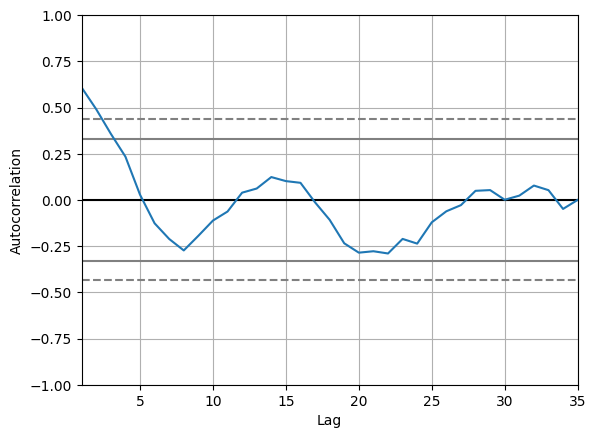

time: 275 ms (started: 2024-04-07 22:52:13 +00:00)


In [ ]:
from pandas.plotting import lag_plot
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
lag_plot(prices)
autocorrelation_plot(prices)
pyplot.show()

# Autoregressive Model (AR)

In [ ]:
sun = sm.datasets.sunspots.load_pandas().data['SUNACTIVITY']
train = agg_data[reduced_cols]
test = agg_data[test_cols]

time: 7.36 ms (started: 2024-04-09 12:45:43 +00:00)


Perform Augumented Dickey-Fuller Test
If p-value <= 0.05, then data is stationary (no time dependent structure).
My data is non-stationary.

In [ ]:
from statsmodels.tsa.stattools import adfuller
adf = adfuller(agg_data.loc['price'])
print('ADF Statistic: %f' % adf[0])
print('p-value: %f' % adf[1])
print('Critical Values:')
for key, value in adf[4].items():
 print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.409376
p-value: 0.139108
Critical Values:
	1%: -3.639
	5%: -2.951
	10%: -2.614
time: 42.9 ms (started: 2024-04-09 12:45:46 +00:00)


Extract plot trend, seasonal and residuals

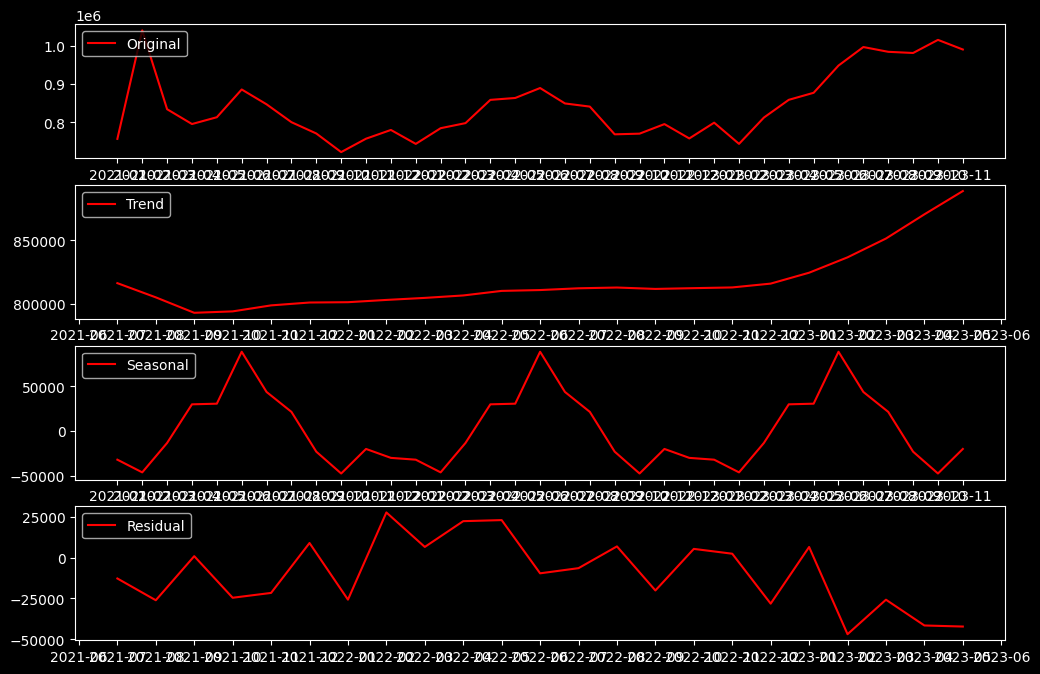

time: 1.19 s (started: 2024-04-09 01:50:27 +00:00)


In [ ]:
import matplotlib.pyplot as plt
decomposition = sm.tsa.seasonal_decompose(agg_data.loc['price'],
                                          model='additive',
                                          period=12)

# Extract the decomposed components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

df = agg_data.loc['price']

# Plot the decomposed components
plt.style.use('dark_background')
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(df, label='Original', color='red')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Trend', color='red')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal, label='Seasonal', color='red')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label='Residual', color='red')
plt.legend(loc='upper left')
plt.show()

Perform Autocorrelation Test

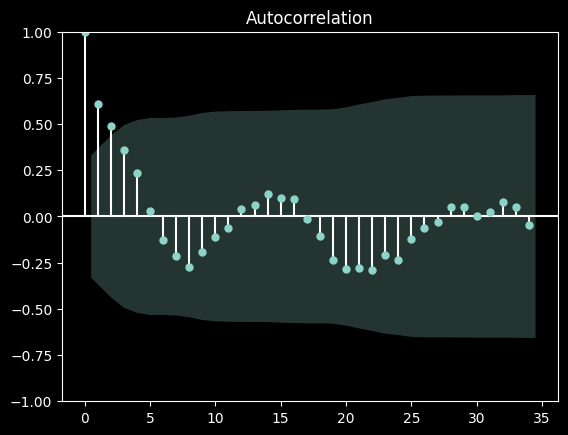

time: 212 ms (started: 2024-04-09 01:51:23 +00:00)


In [ ]:
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(prices, lags=34)
pyplot.show()

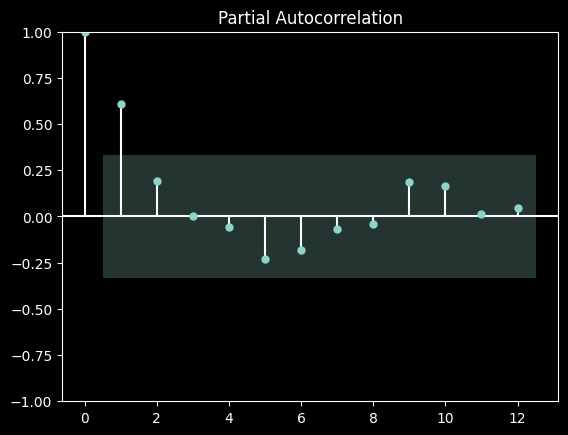

time: 215 ms (started: 2024-04-09 01:51:41 +00:00)


In [ ]:
plot_pacf(prices, lags=12)
pyplot.show()

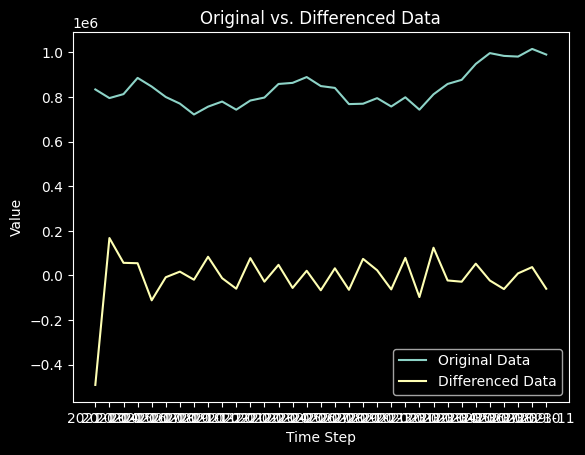

time: 348 ms (started: 2024-04-09 01:51:46 +00:00)


In [ ]:
# Calculate differences
differenced_data = np.diff(agg_data.loc['price'], n=2)
import matplotlib.pyplot as plt
# Plot original and differenced data
plt.plot(agg_data.loc['price'][2:], label="Original Data")
plt.plot(differenced_data, label="Differenced Data")
plt.xlabel("Time Step")
plt.ylabel("Value")
plt.legend()
plt.title("Original vs. Differenced Data")
plt.show()

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as pyplot
model = ARIMA(train.loc['price'],
                order = (1, 2, 0))

result = model.fit()
result.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  price   No. Observations:                   29
Model:                 ARIMA(1, 2, 0)   Log Likelihood                -376.340
Date:                Tue, 09 Apr 2024   AIC                            756.679
Time:                        12:45:51   BIC                            759.271
Sample:                    01-01-2021   HQIC                           757.450
                         - 05-01-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1799      0.013     13.640      0.000       0.154       0.206
sigma2      3.035e+09   9.29e-13   3.27e+21      0.000    3.04e+09    3.04e+09
===================================================================================
Ljung-Box (L1) (Q):                   7.52   Jarque-Bera (JB):                25.73
Prob(Q):                              0.01   Prob(JB):                         0.00
Heteroskedasticity (H):               0.23   Skew:                            -1.12
Prob(H) (two-sided):                  0.04   Kurtosis:                         7.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number    inf. Standard errors may be unstable.
"""

time: 165 ms (started: 2024-04-09 12:45:51 +00:00)


Train Score: 210595.41 RMSE
Test Score: 67136.47 RMSE


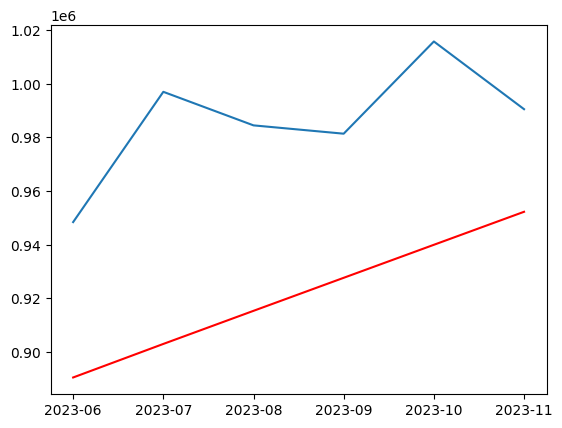

time: 240 ms (started: 2024-04-09 12:45:54 +00:00)


In [ ]:
start_index = 0
end_index = len(train.loc['price'])-1
train_prediction = result.predict(start_index, end_index)

#Prediction
start_index = len(train.loc['price'])
end_index = len(agg_data.loc['price'])-1
base_pred = result.predict(start_index, end_index)
#Rename the column

# plot predictions and actual values

pyplot.plot(test.loc['price'])
pyplot.plot(base_pred.to_list(), color='red')
#prediction.plot(legend = True)
#test.T.plot(legend = True)


import math
from sklearn.metrics import mean_squared_error
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(train.T, train_prediction))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(test.T, base_pred))
print('Test Score: %.2f RMSE' % (testScore))

# SARIMA
## Autoarima gives us best model suited for the data
*   p - number of autoregressive terms (AR)
*   q - Number of moving avergae terms (MA)
*   d - number of non-seasonal differences
*   p, d, q represent non-seasonal components
*   P, D, Q represent seasonal components

In [ ]:
from pmdarima.arima import auto_arima
arima_model = auto_arima(train.loc['price'], start_p = 1, d=2, start_q = 1,
                          max_p = 10, max_q = 10, max_d=10, m = 12,
                          start_P = 1, D=1, start_Q=1, max_P=10, max_D=10, max_Q=10,
                          seasonal = True,
                          trace = True,
                          error_action ='ignore',
                          suppress_warnings = True,
                          stepwise = True, n_fits=1000)

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(1,1,1)[12]             : AIC=inf, Time=0.51 sec
 ARIMA(0,2,0)(0,1,0)[12]             : AIC=406.613, Time=0.02 sec
 ARIMA(1,2,0)(1,1,0)[12]             : AIC=406.966, Time=0.08 sec
 ARIMA(0,2,1)(0,1,1)[12]             : AIC=inf, Time=0.20 sec
 ARIMA(0,2,0)(1,1,0)[12]             : AIC=491.399, Time=0.06 sec
 ARIMA(0,2,0)(0,1,1)[12]             : AIC=397.911, Time=0.06 sec
 ARIMA(0,2,0)(1,1,1)[12]             : AIC=399.513, Time=0.12 sec
 ARIMA(0,2,0)(0,1,2)[12]             : AIC=398.976, Time=0.17 sec
 ARIMA(0,2,0)(1,1,2)[12]             : AIC=400.611, Time=0.28 sec
 ARIMA(1,2,0)(0,1,1)[12]             : AIC=inf, Time=0.16 sec
 ARIMA(1,2,1)(0,1,1)[12]             : AIC=inf, Time=0.42 sec
 ARIMA(0,2,0)(0,1,1)[12] intercept   : AIC=400.403, Time=0.08 sec

Best model:  ARIMA(0,2,0)(0,1,1)[12]          
Total fit time: 2.172 seconds
time: 2.29 s (started: 2024-04-09 12:45:58 +00:00)


In [ ]:
print(arima_model.summary()) # Best Model SARIMAX(0, 2, 0)x(0, 1, [1], 12)

                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                   29
Model:             SARIMAX(0, 2, 0)x(0, 1, [1], 12)   Log Likelihood                -196.955
Date:                              Tue, 09 Apr 2024   AIC                            397.911
Time:                                      01:54:50   BIC                            399.327
Sample:                                  01-01-2021   HQIC                           397.895
                                       - 05-01-2023                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L12      -0.4862      0.267     -1.821      0.069      -1.009       0.037
sigma2      2.136e+

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = ARIMA(train.loc['price'],
                order = (0, 2, 0),
                seasonal_order =(0, 1, [1], 12))

result = model.fit()
result.summary()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.



<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              price   No. Observations:                   29
Model:             ARIMA(0, 2, 0)x(0, 1, [1], 12)   Log Likelihood                -196.955
Date:                            Tue, 09 Apr 2024   AIC                            397.911
Time:                                    12:46:05   BIC                            399.327
Sample:                                01-01-2021   HQIC                           397.895
                                     - 05-01-2023                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L12      -0.4862      0.267     -1.821      0.069      -1.009       0.037
sigma2      2.136e+10   2.65e-12   8.07e+21      0.000    2.14e+10    2.14e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.68   Jarque-Bera (JB):                 5.78
Prob(Q):                              0.41   Prob(JB):                         0.06
Heteroskedasticity (H):               1.19   Skew:                             1.44
Prob(H) (two-sided):                  0.85   Kurtosis:                         3.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number    inf. Standard errors may be unstable.
"""

time: 99.2 ms (started: 2024-04-09 12:46:05 +00:00)


Train Score: 241461.62 RMSE
Test Score: 107792.43 RMSE


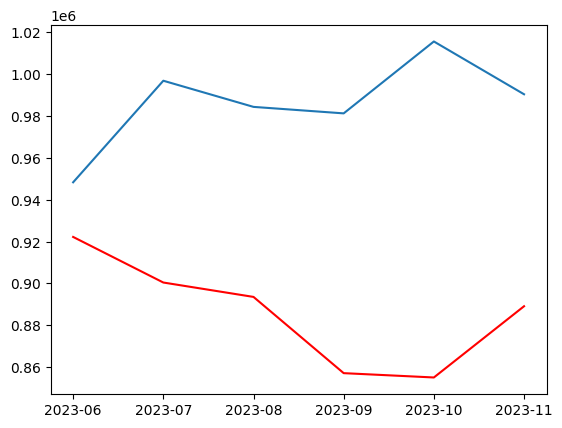

time: 196 ms (started: 2024-04-09 12:46:10 +00:00)


In [ ]:
start_index = 0
end_index = len(train.loc['price'])-1
train_prediction = result.predict(start_index, end_index)

#Prediction
start_index = len(train.loc['price'])
end_index = len(agg_data.loc['price'])-1
sar_pred = result.predict(start_index, end_index)
#Rename the column

# plot predictions and actual values

pyplot.plot(test.loc['price'])
pyplot.plot(sar_pred.to_list(), color='red')
#prediction.plot(legend = True)
#test.T.plot(legend = True)


import math
from sklearn.metrics import mean_squared_error
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(train.T, train_prediction))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(test.T, sar_pred))
print('Test Score: %.2f RMSE' % (testScore))

# ARIMA
Three parameters to pick: p,d,q.
- p:
- d:
- q:

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
def evaluate_arima_model(X, arima_order):
    # prepare training dataset
    train_size = 29
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    train_prediction = result.forecast(start_index, end_index)
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    trainScore = math.sqrt(mean_squared_error(train.T, train_prediction))
    print('Train Score: %.2f RMSE' % (trainScore))
    testScore = math.sqrt(mean_squared_error(test.T, predictions))
    print('Test Score: %.2f RMSE' % (testScore))
    # calculate out of sample error
    error = mean_squared_error(test, predictions)
    return error, predictions, history
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    mse, pred, hist = evaluate_arima_model(dataset, order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s MSE=%.3f' % (order,mse))
                except:
                    continue
    print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))

time: 1.92 ms (started: 2024-04-09 12:46:14 +00:00)


In [ ]:
import warnings
warnings.filterwarnings("ignore") # Some fail to converge using MLE, so disable warnings for now
# evaluate parameters
p_values = range(1,10)
d_values = range(1, 10)
q_values = range(1, 10)
evaluate_models(agg_data.loc['price'], p_values, d_values, q_values)

Train Score: 436427.16 RMSE
Test Score: 34370.42 RMSE
ARIMA(1, 1, 1) MSE=1181325457.216
Train Score: 436427.16 RMSE
Test Score: 36114.02 RMSE
ARIMA(1, 1, 2) MSE=1304222293.334
Train Score: 436427.16 RMSE
Test Score: 36911.92 RMSE
ARIMA(1, 1, 3) MSE=1362489682.426
Train Score: 436427.16 RMSE
Test Score: 35900.82 RMSE
ARIMA(1, 1, 4) MSE=1288868772.573
Train Score: 436427.16 RMSE
Test Score: 42405.06 RMSE
ARIMA(1, 1, 5) MSE=1798188746.523
Train Score: 436427.16 RMSE
Test Score: 38961.34 RMSE
ARIMA(1, 1, 6) MSE=1517986044.913
Train Score: 436427.16 RMSE
Test Score: 73274.36 RMSE
ARIMA(1, 1, 7) MSE=5369131644.666
Train Score: 436427.16 RMSE
Test Score: 37845.56 RMSE
ARIMA(1, 1, 8) MSE=1432286275.792
Train Score: 436427.16 RMSE
Test Score: 40005.49 RMSE
ARIMA(1, 1, 9) MSE=1600439279.936
Train Score: 436427.16 RMSE
Test Score: 38902.19 RMSE
ARIMA(1, 2, 1) MSE=1513380323.215
Train Score: 436427.16 RMSE
Test Score: 31597.37 RMSE
ARIMA(1, 2, 2) MSE=998394087.491
Train Score: 436427.16 RMSE
Test 

In [ ]:
mse, ar_predictions, hist=evaluate_arima_model(agg_data.loc['price'], (5,2,5)) # (0,2,2)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converg

Train Score: 436427.15 RMSE
Test Score: 23735.44 RMSE
time: 2.01 s (started: 2024-04-09 12:46:22 +00:00)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [ ]:
len(agg_data.columns)

35

time: 2.63 ms (started: 2024-04-08 11:34:18 +00:00)


In [ ]:
agg_data

year-month,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07,2021-08,2021-09,2021-10,...,2023-02,2023-03,2023-04,2023-05,2023-06,2023-07,2023-08,2023-09,2023-10,2023-11
price,756321.651133,1.040570e+06,834029.070175,795234.033093,813049.229876,885730.418969,846892.381598,800095.436344,770451.896855,721709.869732,...,743292.468536,812150.387055,858603.682111,877050.049856,948360.319104,996910.457181,984407.594342,981307.374456,1.015673e+06,990438.760062


time: 19.7 ms (started: 2024-04-08 11:38:27 +00:00)


In [ ]:
#agg_data.drop('arima', axis=0, inplace=True)

time: 1.68 ms (started: 2024-04-08 11:38:26 +00:00)


In [ ]:
all_pred = agg_data.copy()
# Overwrite original dataframe
all_pred.loc['arima'] = hist

time: 3.33 ms (started: 2024-04-09 12:47:17 +00:00)


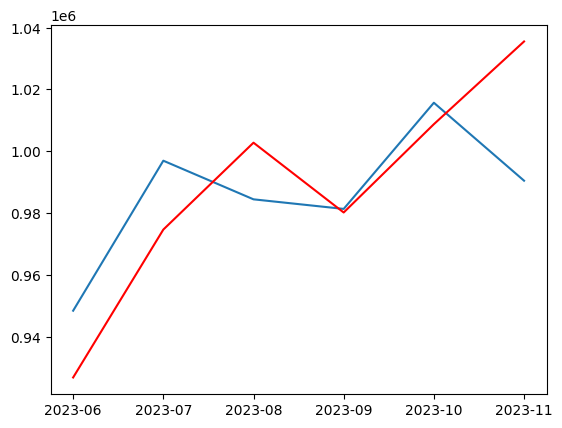

time: 150 ms (started: 2024-04-09 12:47:20 +00:00)


In [ ]:
pyplot.plot(test.loc['price'])
pyplot.plot(ar_predictions, color='red')
pyplot.show()

# SARIMA

In [ ]:
b = ag[ag['price']  <= 2000000] # 2 BIG outliers, houses worth 63 M and 340 M
ex.box(b, x='year-month', y='price')

time: 1.22 s (started: 2024-04-04 16:03:39 +00:00)


In [ ]:
agg_data.shape

(1, 35)

time: 3.99 ms (started: 2024-04-04 17:57:08 +00:00)


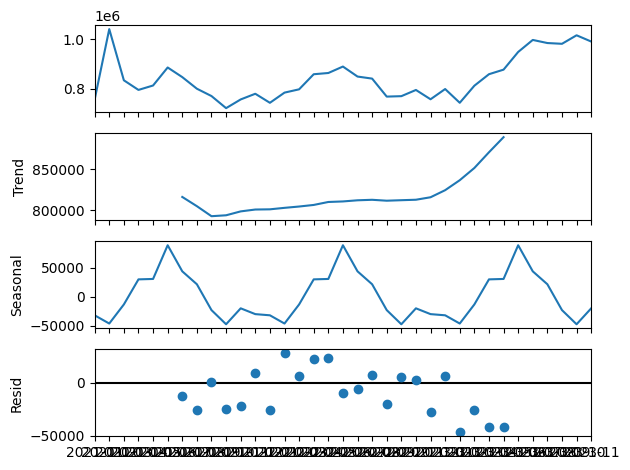

time: 965 ms (started: 2024-04-09 12:47:26 +00:00)


In [ ]:
import matplotlib.pyplot as plt
decomposition = sm.tsa.seasonal_decompose(agg_data.T,
                                          model='additive',
                                          period=12)

# Extract the decomposed components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot the decomposed components
decomposition.plot()
plt.show()

In [ ]:
from statsmodels.tsa.stattools import kpss
# Perform KPSS test
result = kpss(agg_data.T)

# Extract and print the test statistic and p-value
test_statistic = result[0]
p_value = result[1]
print(f"Test Statistic: {test_statistic}")
print(f"P-value: {p_value}")

Test Statistic: 0.35900320743895026
P-value: 0.09482620369010765
time: 1.9 ms (started: 2024-04-09 12:47:34 +00:00)


In [ ]:
import warnings
warnings.filterwarnings("ignore")

time: 671 µs (started: 2024-04-09 12:47:40 +00:00)


In [ ]:
sarima_pred = result.predict(start='2023-06', end='2023-11')

AttributeError: 'tuple' object has no attribute 'predict'

time: 73.1 ms (started: 2024-04-09 12:47:45 +00:00)


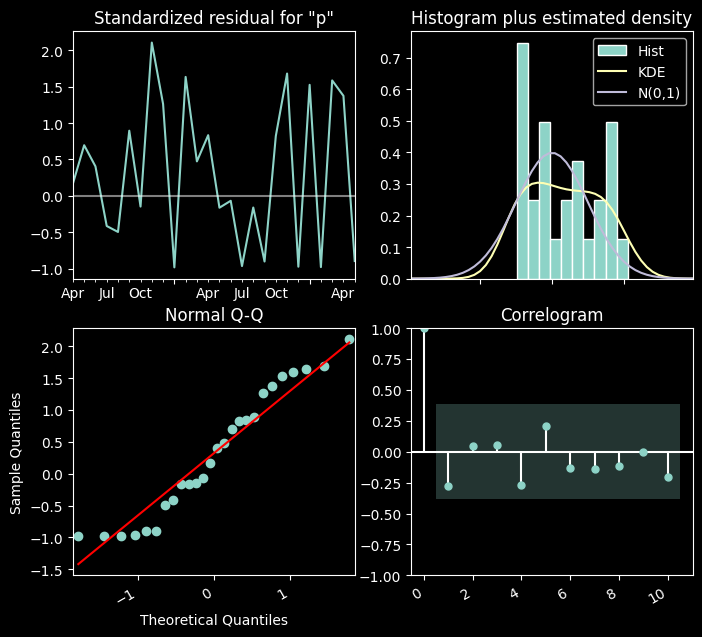

time: 984 ms (started: 2024-04-08 00:50:39 +00:00)


In [ ]:
# Display the model diagnostics
fig = result.plot_diagnostics(figsize=(8, 8))
fig.autofmt_xdate()
plt.show()

# Joint Plot

In [ ]:
base_pred # basic arima
sar_pred # basic sarima
ar_predictions # optimized arima


[926748.0151887323,
 974616.3443266959,
 1002740.5703960682,
 980147.5867380868,
 1008728.3864906641,
 1035499.1525354576]

time: 3.76 ms (started: 2024-04-09 12:47:55 +00:00)


In [ ]:
df["date"][-6:]

year-month
2023-06    2023-06
2023-07    2023-07
2023-08    2023-08
2023-09    2023-09
2023-10    2023-10
2023-11    2023-11
Name: date, dtype: object

time: 5.42 ms (started: 2024-04-09 02:52:32 +00:00)


In [ ]:
df = pd.DataFrame({"date": dates, "price": prices})
import plotly.graph_objects as go
# Configure plot
colors = ['blue', 'green', 'orange', 'red']
fig = go.Figure()
fig.add_trace(go.Scatter(x=df["date"], y=df["price"], mode='lines', name="Actual Prices", line=dict(color=colors[0])))
fig.add_trace(go.Scatter(x=df["date"][-6:], y=sar_pred, mode='lines', name="SARIMA",line=dict(color=colors[1])))
fig.add_trace(go.Scatter(x=df["date"][-6:], y=base_pred, mode='lines',name="Simple ARIMA",line=dict(color=colors[2])))
fig.add_trace(go.Scatter(x=df["date"][-6:], y=ar_predictions, mode='lines', name="Best ARIMA",line=dict(color=colors[3])))
fig.update_layout(
    xaxis_title="Date",
    yaxis_title="Price",
    title="Average Sale Price of Homes in Boston Metropolitan Area"
)
# Define scatter plot with zero-sized markers
fig.add_vline(x='2023-06-01')
# Display plot
#fig.update_layout(title_y=0.85)
#fig.update_layout(xaxis_title_font_size=14, yaxis_title_font_size=14)

config = {
  'toImageButtonOptions': {
    'format': 'png', # one of png, svg, jpeg, webp
    'filename': 'all',
    'height': 1080,
    'width': 2040,
    'scale': 1 # Multiply title/legend/axis/canvas sizes by this factor
  }
}
fig.show(config=config)

time: 29.4 ms (started: 2024-04-09 12:48:03 +00:00)


In [ ]:
agg_data['2023-06']

price    948360.319104
Name: 2023-06, dtype: float64

time: 5.74 ms (started: 2024-04-09 12:57:42 +00:00)


In [ ]:
np.sqrt(mean_squared_error(agg_data['2023-06'],agg_data['2023-05']))

71310.26924758952

time: 4.12 ms (started: 2024-04-09 12:59:02 +00:00)


In [ ]:
differenced_data = np.diff(agg_data.loc['price'], n=1)

time: 1.03 ms (started: 2024-04-09 13:04:46 +00:00)


In [ ]:
agg_data

year-month,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07,2021-08,2021-09,2021-10,...,2023-02,2023-03,2023-04,2023-05,2023-06,2023-07,2023-08,2023-09,2023-10,2023-11
price,756321.651133,1.040570e+06,834029.070175,795234.033093,813049.229876,885730.418969,846892.381598,800095.436344,770451.896855,721709.869732,...,743292.468536,812150.387055,858603.682111,877050.049856,948360.319104,996910.457181,984407.594342,981307.374456,1.015673e+06,990438.760062


time: 25.4 ms (started: 2024-04-09 13:08:18 +00:00)


In [ ]:
(np.sum(differenced_data**2)//34)**1/2

2607968884.5

time: 2.82 ms (started: 2024-04-09 13:11:09 +00:00)


In [ ]:
np.mean(np.abs(differenced_data)**2)**1/2

2607968884.75429

time: 3.1 ms (started: 2024-04-09 13:07:57 +00:00)


# Neural Network (LSTM)

In [ ]:
import torch

# Convert the time series data to PyTorch tensors
train_data = torch.FloatTensor(train.to_numpy()).unsqueeze(1)
test_data = torch.FloatTensor(test.to_numpy()).unsqueeze(1)

AttributeError: 'numpy.ndarray' object has no attribute 'to_numpy'

time: 35.9 ms (started: 2024-04-08 14:17:12 +00:00)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.optimizers import Adam
tf.random.set_seed(42)

time: 29.8 ms (started: 2024-04-08 14:17:23 +00:00)


In [ ]:
dataset = agg_data.T.values
dataset = dataset.astype('float64')
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = 29
test_size = dataset.size - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

29 6
time: 4.17 ms (started: 2024-04-08 14:17:25 +00:00)


In [ ]:
def create_dataset(dataset, look_back=6):
  dataX, dataY = [], []
  for i in range(len(dataset)-look_back-1):
    a = dataset[i:(i+look_back), 0]
    dataX.append(a)
    dataY.append(dataset[i + look_back, 0])
  return np.array(dataX), np.array(dataY)

time: 772 µs (started: 2024-04-08 14:17:44 +00:00)


In [ ]:
testX

array([], dtype=float64)

time: 13 ms (started: 2024-04-08 14:18:16 +00:00)


Epoch 1/25
27/27 - 2s - loss: 0.1047 - 2s/epoch - 76ms/step
Epoch 2/25
27/27 - 0s - loss: 0.0813 - 72ms/epoch - 3ms/step
Epoch 3/25
27/27 - 0s - loss: 0.0715 - 74ms/epoch - 3ms/step
Epoch 4/25
27/27 - 0s - loss: 0.0580 - 71ms/epoch - 3ms/step
Epoch 5/25
27/27 - 0s - loss: 0.0503 - 81ms/epoch - 3ms/step
Epoch 6/25
27/27 - 0s - loss: 0.0444 - 69ms/epoch - 3ms/step
Epoch 7/25
27/27 - 0s - loss: 0.0441 - 78ms/epoch - 3ms/step
Epoch 8/25
27/27 - 0s - loss: 0.0474 - 92ms/epoch - 3ms/step
Epoch 9/25
27/27 - 0s - loss: 0.0401 - 75ms/epoch - 3ms/step
Epoch 10/25
27/27 - 0s - loss: 0.0420 - 90ms/epoch - 3ms/step
Epoch 11/25
27/27 - 0s - loss: 0.0358 - 80ms/epoch - 3ms/step
Epoch 12/25
27/27 - 0s - loss: 0.0429 - 72ms/epoch - 3ms/step
Epoch 13/25
27/27 - 0s - loss: 0.0409 - 79ms/epoch - 3ms/step
Epoch 14/25
27/27 - 0s - loss: 0.0393 - 76ms/epoch - 3ms/step
Epoch 15/25
27/27 - 0s - loss: 0.0436 - 69ms/epoch - 3ms/step
Epoch 16/25
27/27 - 0s - loss: 0.0390 - 69ms/epoch - 3ms/step
Epoch 17/25
27/27 

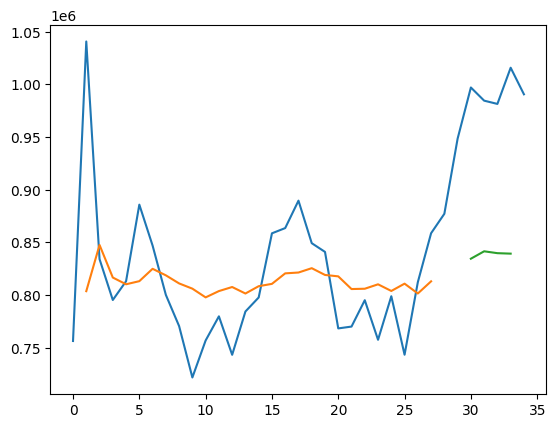

time: 5.25 s (started: 2024-04-08 17:17:26 +00:00)


In [ ]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(10, input_shape=(look_back, 1)))
model.add(Dropout(0.4))
model.add(Dense(1, activation="relu"))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=25, batch_size=1, verbose=2)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
trainPredict.size

27

time: 2.85 ms (started: 2024-04-08 14:19:07 +00:00)


In [ ]:
testPredict, testY[0]

(array([[828903.56],
        [834069.25],
        [832773.3 ],
        [832448.1 ]], dtype=float32),
 array([ 996910.45718085,  984407.59434183,  981307.37445573,
        1015672.78853165]))

time: 3.24 ms (started: 2024-04-08 14:19:08 +00:00)


In [ ]:
from keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.layers import Conv1D, LSTM, Dense, BatchNormalization
from keras.utils import set_random_seed
set_random_seed(42)

time: 49.1 ms (started: 2024-04-08 17:17:51 +00:00)


In [ ]:
train_neural = agg_data[reduced_cols]
test_neural = agg_data[test_cols]

time: 2.48 ms (started: 2024-04-08 17:15:18 +00:00)


In [ ]:
generator = TimeseriesGenerator(train_neural.loc['price'], train_neural.loc['price'], length=6, batch_size=1)
n_input = 6
n_features = 1
model = Sequential()
model.add(LSTM(20, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(generator, steps_per_epoch=10, epochs=50, verbose=1)

Epoch 1/50
10/10 [==============================] - 2s 5ms/step - loss: 782871953408.0000
Epoch 2/50
10/10 [==============================] - 0s 5ms/step - loss: 647609384960.0000
Epoch 3/50
10/10 [==============================] - 0s 4ms/step - loss: 498685378560.0000
Epoch 4/50
10/10 [==============================] - 0s 5ms/step - loss: 386656141312.0000
Epoch 5/50
10/10 [==============================] - 0s 5ms/step - loss: 403523862528.0000
Epoch 6/50
10/10 [==============================] - 0s 5ms/step - loss: 315057799168.0000
Epoch 7/50
10/10 [==============================] - 0s 6ms/step - loss: 204466454528.0000
Epoch 8/50
10/10 [==============================] - 0s 6ms/step - loss: 191948111872.0000
Epoch 9/50
10/10 [==============================] - 0s 5ms/step - loss: 192007929856.0000
Epoch 10/50
10/10 [==============================] - 0s 5ms/step - loss: 165087363072.0000
Epoch 11/50
10/10 [==============================] - 0s 4ms/step - loss: 84436623360.0000
Epoch 12/

time: 7 s (started: 2024-04-08 17:24:47 +00:00)


In [ ]:
train_lstm_x, train_lstm_y = [], []
for x, y in generator:
  train_lstm_x.append(x)
  train_lstm_y.append(y)

training_pred = []
for item in train_lstm_x:
  trainPredict = model.predict(item.reshape((1, 6, 1)))
  training_pred.append(trainPredict)
train_lstm_y = np.vstack(train_lstm_y)

trainScore = np.sqrt(mean_squared_error(np.array(training_pred).reshape(23,1), train_lstm_y))
print('Train Score: %.2f RMSE' % (trainScore))

1/1 [==============================] - 0s 27ms/step
Train Score: 102642.79 RMSE
time: 2.29 s (started: 2024-04-08 17:24:56 +00:00)


In [ ]:
inp = np.array(agg_data.to_numpy()[:, -6:])
x_input = inp.reshape((1, 6, 1))
yhats = []
for i in range(6):
  x_input = x_input.reshape((1, 6, 1))
  yhat = model.predict(x_input, verbose=0)
  yhats.append(yhat)
  x_input = np.vstack((x_input[:,1:][0], yhat))
actual = np.array(agg_data.to_numpy()[:, 35-6:])
testScore = np.sqrt(mean_squared_error(actual, np.array(yhats).reshape(1,6)))
print('Test Score: %.2f RMSE' % (testScore))

Test Score: 73146.88 RMSE
time: 505 ms (started: 2024-04-08 17:25:03 +00:00)


In [ ]:
neural_pred = training_pred + yhats

time: 401 µs (started: 2024-04-08 17:25:14 +00:00)
